![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [136]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Which hour has the highest frequency of crimes? Store as an integer variable called **peak_crime_hour**.

In [137]:
# We need to create a new columns for the hour of the day
crimes['Hour_of_day'] = crimes['TIME OCC'].str[:2]

# We need to convert the hour of the day to an integer
peak_crime_hour = int(crimes['Hour_of_day'].value_counts().idxmax())

# Show the peak crime hour
peak_crime_hour

12

Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called **peak_night_crime_location**.

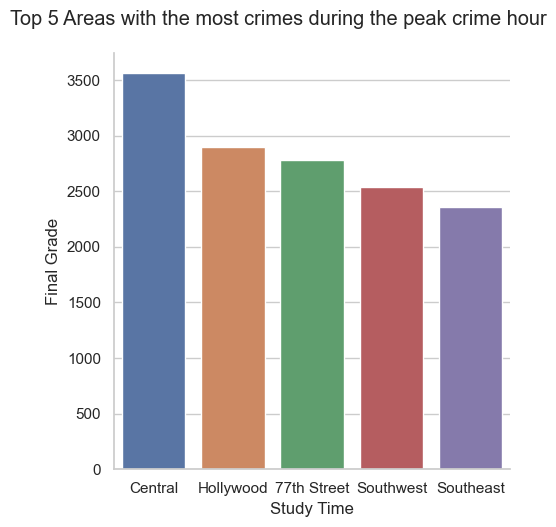

In [140]:
# We need to find the location with the most crimes during the peak crime hour

# Filter the data to only include the peak crime hour
night_crimes = crimes[(crimes['Hour_of_day'].astype(int) >= 22) | (crimes['Hour_of_day'].astype(int) <= 4)]

peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
peak_night_crime_location

# WE are going to plot the top 5 locations with the most crimes during the peak crime hour
# Filters the data to only include the top 5 locations
top_areas = night_crimes['AREA NAME'].value_counts().head(5)
top_night_crimes = night_crimes[night_crimes['AREA NAME'].isin(top_areas.index)]

# Graph
sns.set_style('whitegrid')
graph = sns.catplot(data=top_night_crimes, 
                        kind = 'count',
                        x= 'AREA NAME',
                        order = top_areas.index,)

# Styles
graph.figure.suptitle('Top 5 Areas with the most crimes during the peak crime hour', y = 1.05)
graph.set(xlabel = 'Study Time', ylabel ='Final Grade')


plt.show()

Identify the number of crimes committed against victims of different age groups. Save as a pandas Series **called victim_ages**, with age group labels **"0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+"** as the index and the frequency of crimes as the values.

c:\Users\codlw\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\codlw\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


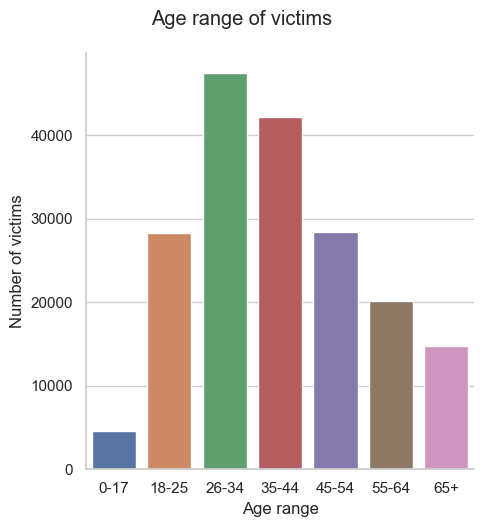

In [145]:
# We need to find the most common crime type during the peak crime hour
from traitlets import observe


crimes['age_range'] = pd.cut(crimes['Vict Age'], 
                                bins=[0, 17, 25, 34, 44, 54, 64, float('inf')], 
                                labels=['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+'],
                                include_lowest= False
                                )

victim_ages = crimes['age_range'].value_counts().sort_index()

graph2 = sns.catplot(data = crimes, 
                        kind = 'count',
                        x = 'age_range',
                        order = victim_ages.index,
                        )
graph2.figure.suptitle('Age range of victims', y = 1.05)
graph2.set(xlabel = 'Age range', ylabel ='Number of victims')

plt.show()